<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [3]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1. Definición del problema

Objetivo: Predecir el valor medio de la vivienda a partir de variables socio-demográficas y geográficas del censo de California.

Tiendose las columnas numéricas del dataset de sklearn.datasets.fetch_california_housing:
MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude.

Resultado esperado: Se espera obtener como resultado el valor medio de la vivienda, en cientos de miles de USD.

Se tienen como criterios de evaluación a MAE, MSE, RMSE, MAPE, sMAPE y R² como referencia.



### 2. Estadística descriptiva.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [5]:
from IPython.display import display

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

# Métricas auxiliares (corrección de sMAPE incluida)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.abs(y_true) + np.abs(y_pred)
    mask = denom != 0
    return 100 * np.mean(2.0 * np.abs(y_pred[mask] - y_true[mask]) / denom[mask])

def regression_metrics(df):
    """
    Aplica MAE, MSE, RMSE, MAPE, sMAPE y R^2.
    df: DataFrame con columnas ['y', 'yhat']
    """
    y_true = df['y']
    y_pred = df['yhat']
    return pd.DataFrame({
        'mae':  [round(mean_absolute_error(y_true, y_pred), 4)],
        'mse':  [round(mean_squared_error(y_true, y_pred), 4)],
        'rmse': [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)],
        'mape': [round(mean_absolute_percentage_error(y_true, y_pred), 4)],
        'smape':[round(smape(y_true, y_pred), 4)],
        'r2':   [round(r2_score(y_true, y_pred), 4)]
    })

# Carga de datos
housing_data = fetch_california_housing(as_frame=True)
housing = housing_data['data'].copy()
housing['target'] = housing_data['target']

# Vista rápida y estadísticas
display(housing.head())
estadisticas = housing.describe()
display(estadisticas)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 3. Visualización descriptiva

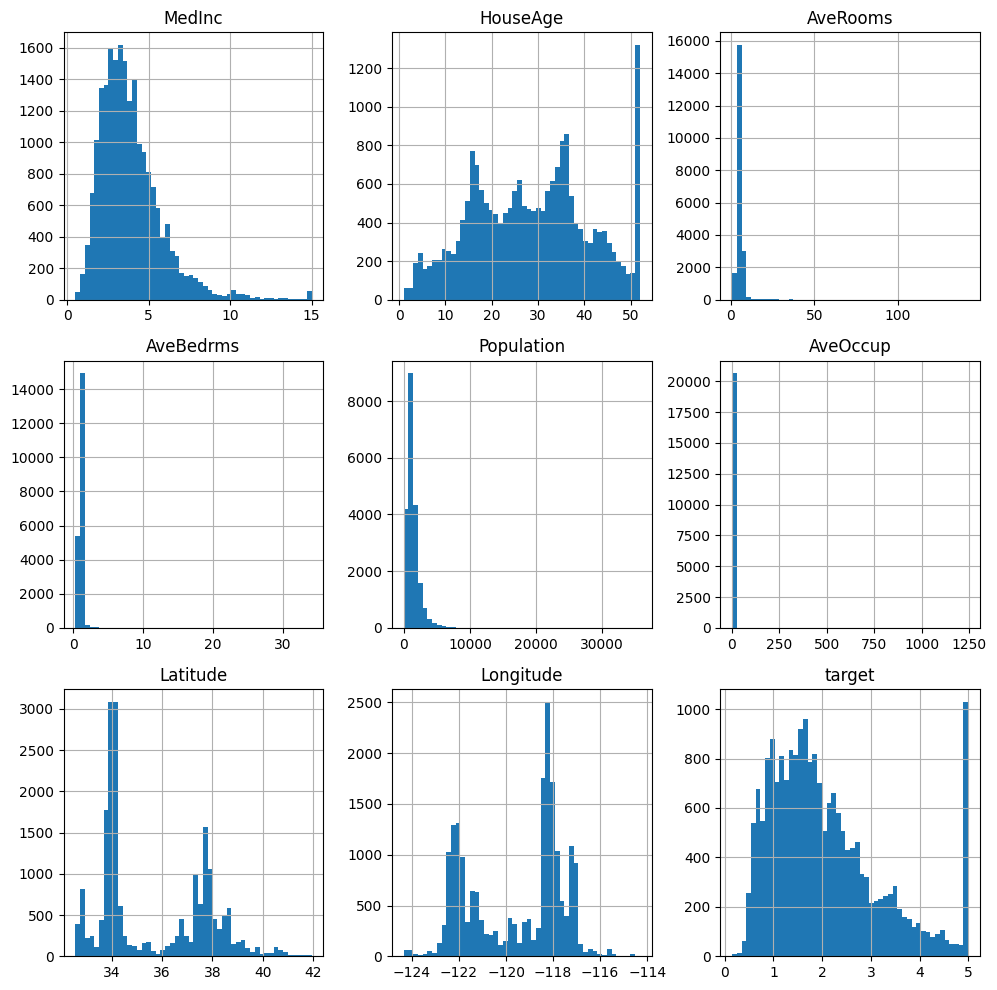

In [6]:
_ = housing.hist(bins=50, figsize=(10, 10))
plt.tight_layout()
plt.show()


### 4. Preporcesamiento

In [7]:
# Estandarización
scaler = StandardScaler()
housing_standard = scaler.fit_transform(housing)
housing_standard = pd.DataFrame(housing_standard, columns = housing.columns)

# Separamos las variables
X = housing_standard.drop('target', axis = 1).values
Y = housing['target'].values

# Separamos los datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print('Separando informacion:\n')
print('numero de filas data original : ', len(X))
print('numero de filas train set     : ', len(X_train))
print('numero de filas test set      : ', len(X_test))

Separando informacion:

numero de filas data original :  20640
numero de filas train set     :  16512
numero de filas test set      :  4128


### 5. Selección de modelo

In [8]:
# 1) Regresión Lineal
start = time.time()
LR = LinearRegression()
LR.fit(X_train, Y_train)
t_LR = time.time() - start
df_LR = pd.DataFrame({'y': Y_test, 'yhat': LR.predict(X_test)})

# 2) Support Vector Regression (kernel lineal)
start = time.time()
SVM = svm.SVR(kernel='linear')
SVM.fit(X_train, Y_train)
t_SVM = time.time() - start
df_SVM = pd.DataFrame({'y': Y_test, 'yhat': SVM.predict(X_test)})

# 3) K-Nearest Neighbors Regressor (por defecto k=5)
start = time.time()
KNR = KNeighborsRegressor()
KNR.fit(X_train, Y_train)
t_KNR = time.time() - start
df_KNR = pd.DataFrame({'y': Y_test, 'yhat': KNR.predict(X_test)})

# 4) Árbol de Decisión
start = time.time()
DTree = DecisionTreeRegressor(random_state=42)
DTree.fit(X_train, Y_train)
t_DTree = time.time() - start
df_DTree = pd.DataFrame({'y': Y_test, 'yhat': DTree.predict(X_test)})


### 6. Métricas y análisis de resultados

In [9]:
def metricas(nombre_modelo, df_pred, t_exec):
    out = regression_metrics(df_pred).join(
        pd.DataFrame({'execution_time_s': [round(t_exec, 4)]}),
        how='left'
    )
    print(f'\n{nombre_modelo}:')
    display(out)

print('Métricas:')
metricas('Regresión Lineal', df_LR, t_LR)
metricas('SVR (lineal)',     df_SVM, t_SVM)
metricas('KNN Regressor',    df_KNR, t_KNR)
metricas('Árbol de Decisión',df_DTree, t_DTree)


Métricas:

Regresión Lineal:


,mae,mse,rmse,mape,smape,r2,execution_time_s
0,0.5332,0.5559,0.7456,31.9522,28.6778,0.5758,0.0608



SVR (lineal):


,mae,mse,rmse,mape,smape,r2,execution_time_s
0,0.512,0.5793,0.7611,28.3874,27.236,0.558,40.3195



KNN Regressor:


,mae,mse,rmse,mape,smape,r2,execution_time_s
0,0.4455,0.4338,0.6586,24.6299,22.0041,0.669,0.022



Árbol de Decisión:


,mae,mse,rmse,mape,smape,r2,execution_time_s
0,0.4538,0.4943,0.703,24.8667,22.3733,0.6228,0.2939


### 7. Visualización de resultados de los modelos

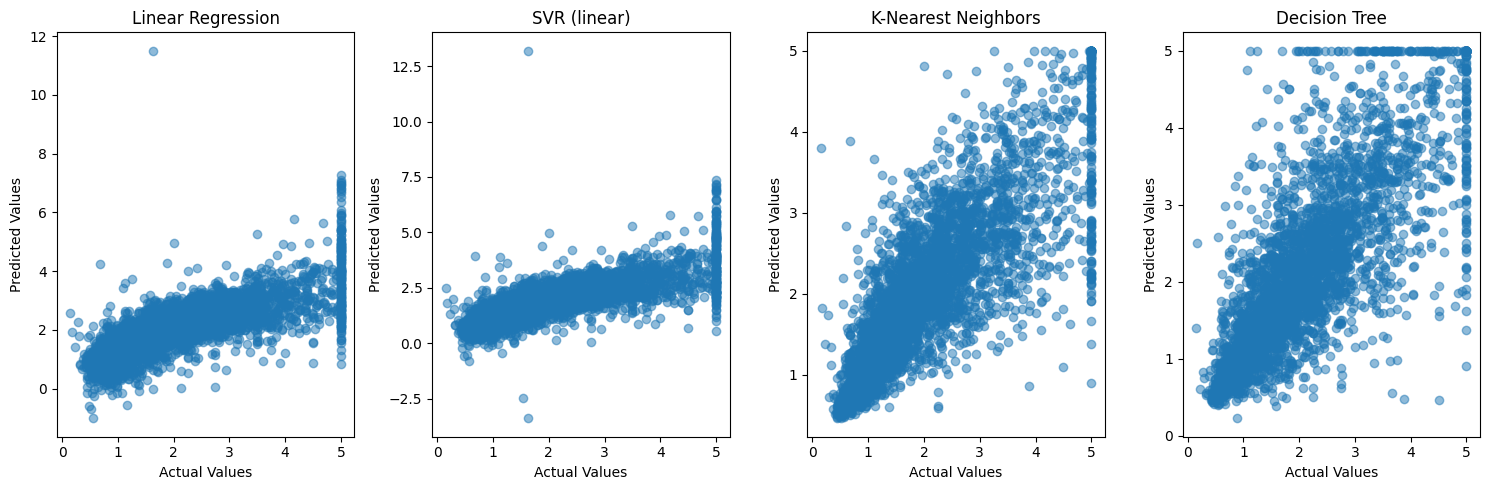

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.scatter(df_LR['y'], df_LR['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')

plt.subplot(1, 4, 2)
plt.scatter(df_SVM['y'], df_SVM['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR (linear)')

plt.subplot(1, 4, 3)
plt.scatter(df_KNR['y'], df_KNR['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors')

plt.subplot(1, 4, 4)
plt.scatter(df_DTree['y'], df_DTree['yhat'], alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree')

plt.tight_layout()
plt.show()


### 8 Conclusiones.

Se puede observar que KNN fue el que mostró el mejor desempeño global con un RMSE≈0.659, R²≈0.669 y sMAPE≈22%, seguido por el Árbol de Decisión con un RMSE≈0.703 y  R²≈0.623.
Mientras tanto, podemos notar que los modelos lineales quedaron atrás, ya que la Regresión Lineal tuvo un RMSE≈0.746 y R²≈0.576, y SVR lineal tuvo un RMSE≈0.761 y R²≈0.558.
En tiempo de cómputo, el modelo de regresión lineal fue casi instantáneo, mientras que SVR resultó el más costoso con un tiempo aproximado de 40.3 segundos.

Los gráficos confirman que los modelos lineales subestiman valores altos y no capturan bien curvaturas, además se observa un techo cercano a 5.
También se puede visualizar que los modelos KNN y de Árbol modelan mejor los patrones locales, aunque el Árbol produce predicciones discretas y sugiere riesgo de sobreajuste.

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [13]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [15]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [16]:
# Información general y tipos
print("Forma del DataFrame:", digits.shape)
print("\nInformación del DataFrame:")
digits.info()

# Descripción estadística
print("\nDescripción estadística (primeras columnas y target):")
display(digits.iloc[:, :6].join(digits['target']).describe())


Forma del DataFrame: (1797, 65)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null  

,c00,c01,c02,c03,c04,c05,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [17]:
# Memoria usada (bytes, KB, MB)
mem_bytes = digits.memory_usage(deep=True).sum()
print("\nMemoria usada:")
print(f" - bytes: {mem_bytes}")
print(f" - KB: {mem_bytes/1024:.1f}")
print(f" - MB: {mem_bytes/1024/1024:.3f}")


Memoria usada:
 - bytes: 934572
 - KB: 912.7
 - MB: 0.891


In [18]:
# Valores faltantes y duplicados
na_counts = digits.isna().sum().sum()
dup_rows = digits.duplicated().sum()
print("\nCalidad de datos:")
print(f" - Faltantes totales: {na_counts}")
print(f" - Filas duplicadas:  {dup_rows}")



Calidad de datos:
 - Faltantes totales: 0
 - Filas duplicadas:  0


In [21]:
# Distribución por clase (conteos y %)
vc = digits['target'].value_counts().sort_index()
print("\nDistribución de registros por clase (conteo):")
display(vc)
print("Distribución porcentual por clase:")
display((vc / len(digits) * 100).round(2))


Distribución de registros por clase (conteo):


,count
target,
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174


Distribución porcentual por clase:


,count
target,
0,9.91
1,10.13
2,9.85
3,10.18
4,10.07
5,10.13
6,10.07
7,9.96
8,9.68


In [22]:

# Rango de los píxeles y chequeo de clases válidas
pixel_cols = [c for c in digits.columns if c.startswith('c')]
px_min = digits[pixel_cols].min().min()
px_max = digits[pixel_cols].max().max()
targets_unicos = sorted(digits['target'].unique())
print("\nRangos y consistencia:")
print(f" - Rango de píxeles esperado: 0..16  | observado: {px_min}..{px_max}")
print(f" - Clases esperadas: 0..9            | observadas: {targets_unicos}")

# Heurística simple de anomalías: targets fuera de 0..9 o píxeles fuera de 0..16
anomalos_target = digits.loc[~digits['target'].isin(range(10))]
anomalos_pix = digits.loc[(digits[pixel_cols] < 0).any(axis=1) | (digits[pixel_cols] > 16).any(axis=1)]
print("\nAnomalías (si existen):")
print(f" - Filas con target fuera de 0..9: {len(anomalos_target)}")
print(f" - Filas con píxeles fuera de 0..16: {len(anomalos_pix)}")



Rangos y consistencia:
 - Rango de píxeles esperado: 0..16  | observado: 0..16
 - Clases esperadas: 0..9            | observadas: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]

Anomalías (si existen):
 - Filas con target fuera de 0..9: 0
 - Filas con píxeles fuera de 0..16: 0


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [23]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

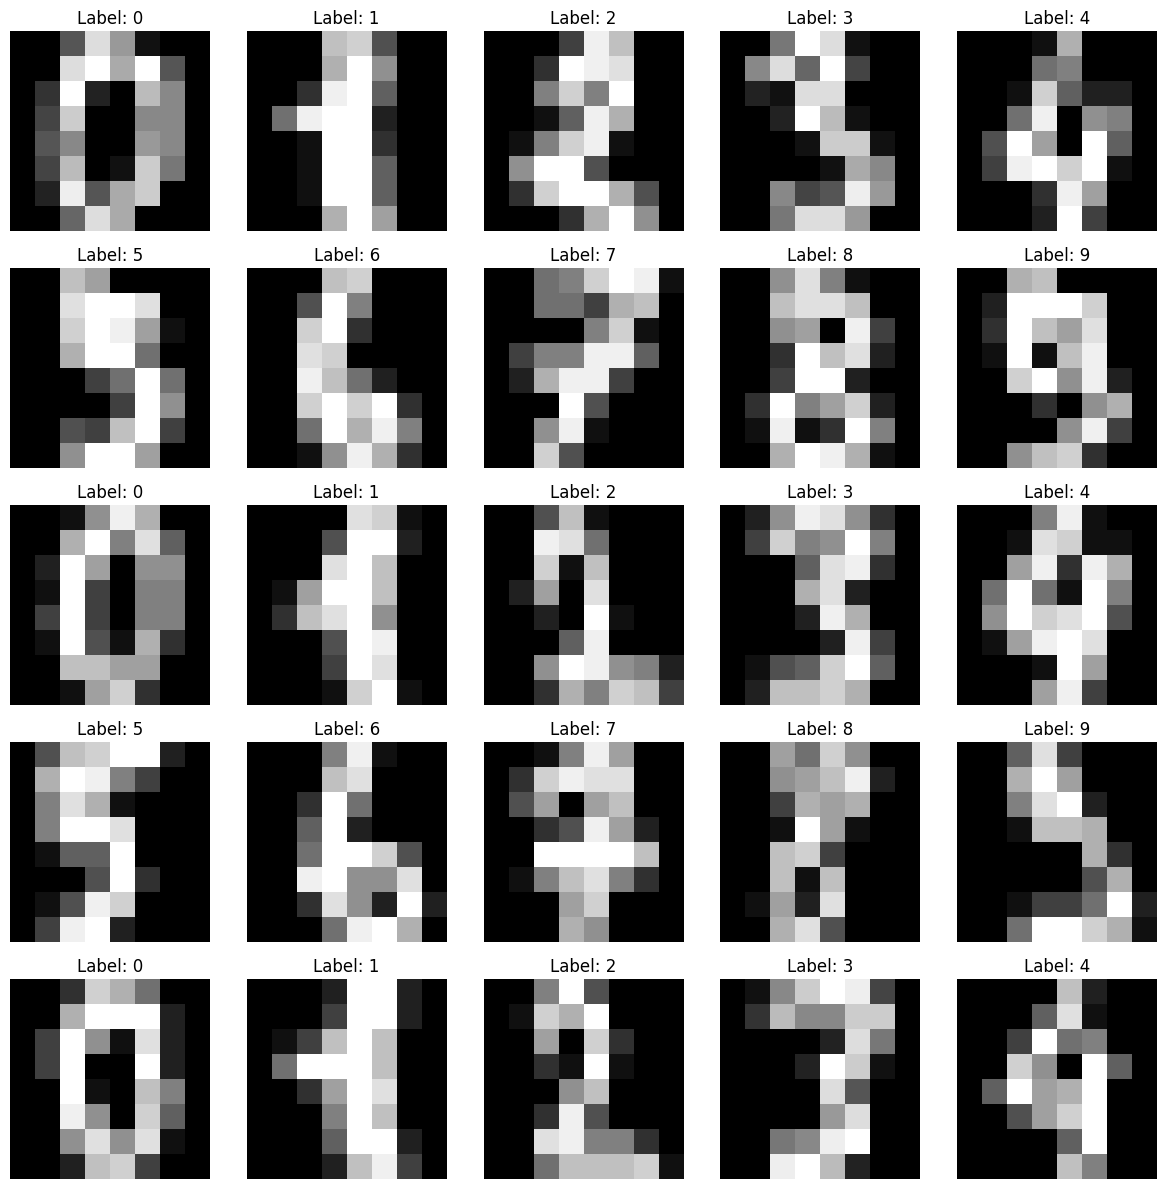

In [24]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    ax.imshow(digits_dict["images"][i], cmap="gray")
    ax.set_title(f"Label: {digits_dict['target'][i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

target_names = [str(i) for i in sorted(np.unique(y_test))]
print(f"Train: {len(X_train)} | Test: {len(X_test)}")

Train: 1203 | Test: 594


Accuracy (score): 0.9545454545454546
Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.90      0.92      0.91        60
           2       1.00      1.00      1.00        59
           3       0.97      0.98      0.98        60
           4       0.95      0.98      0.97        60
           5       0.97      0.97      0.97        60
           6       0.98      0.98      0.98        60
           7       0.97      0.98      0.97        59
           8       0.85      0.81      0.83        58
           9       0.95      0.93      0.94        59

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594

Tiempo de ajuste (s): 0.7649588584899902


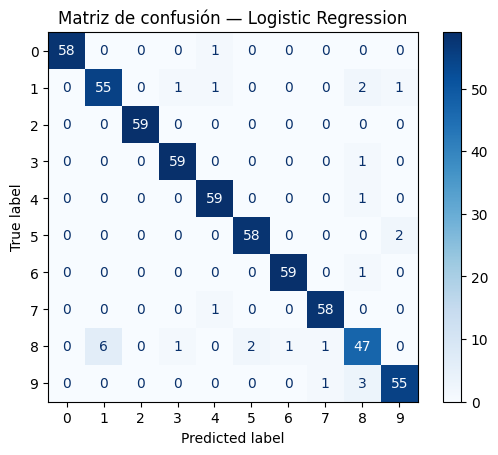

In [27]:
# Modelo de clasificación: Regresión Logística
start = time.time()
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
LR.fit(X_train, y_train)
end = time.time()

y_pred = LR.predict(X_test)
print('Accuracy (score):', LR.score(X_test, y_test))
print('Reporte de métricas:')
print(classification_report(y_test, y_pred, target_names=target_names))

print('Tiempo de ajuste (s):', end - start)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión — Logistic Regression')
plt.show()


Accuracy (score): 0.9848484848484849
Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.95      1.00      0.98        60
           2       1.00      1.00      1.00        59
           3       0.98      1.00      0.99        60
           4       0.97      1.00      0.98        60
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        59
           8       0.98      0.91      0.95        58
           9       0.98      0.97      0.97        59

    accuracy                           0.98       594
   macro avg       0.99      0.98      0.98       594
weighted avg       0.99      0.98      0.98       594

Tiempo de ajuste (s): 0.001986980438232422


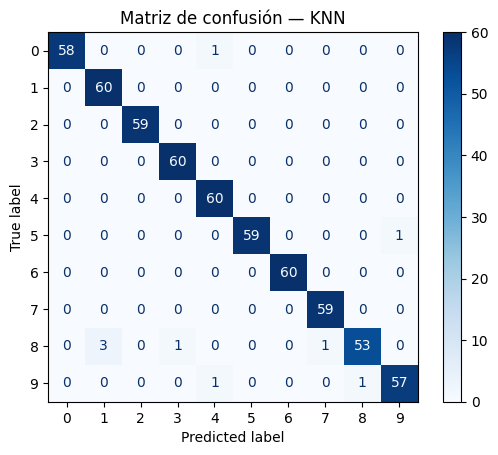

In [28]:
# Modelo de clasificación: K-Nearest Neighbors
start = time.time()
KNE = KNeighborsClassifier()  # k=5 por defecto
KNE.fit(X_train, y_train)
end = time.time()

y_pred = KNE.predict(X_test)
print('Accuracy (score):', KNE.score(X_test, y_test))
print('Reporte de métricas:')
print(classification_report(y_test, y_pred, target_names=target_names))

print('Tiempo de ajuste (s):', end - start)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión — KNN')
plt.show()


Accuracy (score): 0.98989898989899
Reporte de métricas:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        60
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00        60
           4       0.98      0.98      0.98        60
           5       1.00      0.98      0.99        60
           6       1.00      1.00      1.00        60
           7       0.98      1.00      0.99        59
           8       0.98      0.97      0.97        58
           9       0.98      0.98      0.98        59

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Tiempo de ajuste (s): 0.029198408126831055


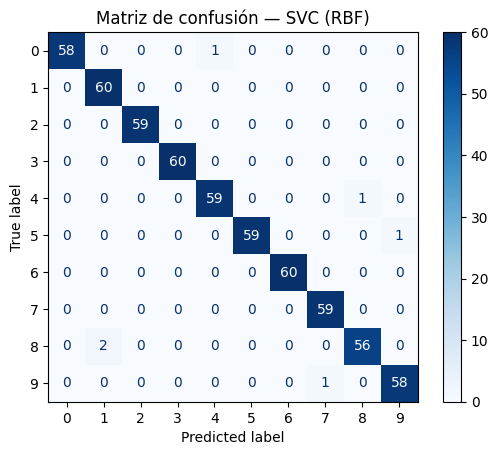

In [26]:
# Modelo de clasificación:  SVC (kernel RBF por defecto)
start = time.time()
svc = SVC()  # kernel='rbf', gamma='scale' por defecto
svc.fit(X_train, y_train)
end = time.time()

y_pred = svc.predict(X_test)
print('Accuracy (score):', svc.score(X_test, y_test))
print('Reporte de métricas:')
print(classification_report(y_test, y_pred, target_names=target_names))

print('Tiempo de ajuste (s):', end - start)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión — SVC (RBF)')
plt.show()


* ¿Cuál modelo es mejor basado en sus métricas?

Respuesta: El mejor modelo basado en sus métricas sería el modelo SVC (RBF), ya que tiene una accuracy ≈ 0.9899, la cual es superior a la accuracy de KNN ≈0.9848 y de la Regresión Logística ≈0.9545, también de que SVC (RBF) tiene un F1 macro ≈ 0.99. Además la matriz de confusión de SVC (RBF) muestra menos errores globales.

* ¿Cuál modelo demora menos tiempo en ajustarse?

Respuesta: El modelo que se demora menos tiempo en ajustarse es el KNN, con un tiempo de ajuste de ~0.0019 segundos , el cual es menor al tiempo de ajuste del modelo SVC (RBF) con ~0.022 segundos y de la Regresión Logística con ~0.765 segundos. KNN es casi instantáneo al entrenar porque traslada el costo al momento de predecir.

* ¿Qué modelo escoges?

Respuesta: El modelo que escogería sería SVC (RBF) por su mejor desempeño (accuracy y F1) y errores mínimos. Pero, si la prioridad fuera solo la rapidez de entrenamiento, el modelo KNN sería mi opción.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [29]:
#Imports para ROC/AUC (multiclase)
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc


classes = np.arange(10)
n_classes = len(classes)

# Binarizamos el y_test para esquema one-vs-rest
y_test_bin = label_binarize(y_test, classes=classes)


In [30]:
# Entrenamiento del clasificador one-vs-rest con SVC (RBF)
ovr_svc = OneVsRestClassifier(SVC(kernel="rbf", gamma="scale"))
ovr_svc.fit(X_train, y_train)

y_score = ovr_svc.decision_function(X_test)

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average (promedio de las curvas por clase)
# 1) Unir todos los puntos FPR
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# 2) Interpolar y promediar TPRs
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print("AUC por clase:")
for i in range(n_classes):
    print(f"Clase {i}: AUC = {roc_auc[i]:.4f}")
print(f"\nAUC micro-average: {roc_auc['micro']:.4f}")
print(f"AUC macro-average: {roc_auc['macro']:.4f}")


AUC por clase:
Clase 0: AUC = 1.0000
Clase 1: AUC = 0.9989
Clase 2: AUC = 1.0000
Clase 3: AUC = 0.9998
Clase 4: AUC = 1.0000
Clase 5: AUC = 0.9948
Clase 6: AUC = 0.9998
Clase 7: AUC = 1.0000
Clase 8: AUC = 0.9966
Clase 9: AUC = 0.9990

AUC micro-average: 0.9991
AUC macro-average: 0.9992


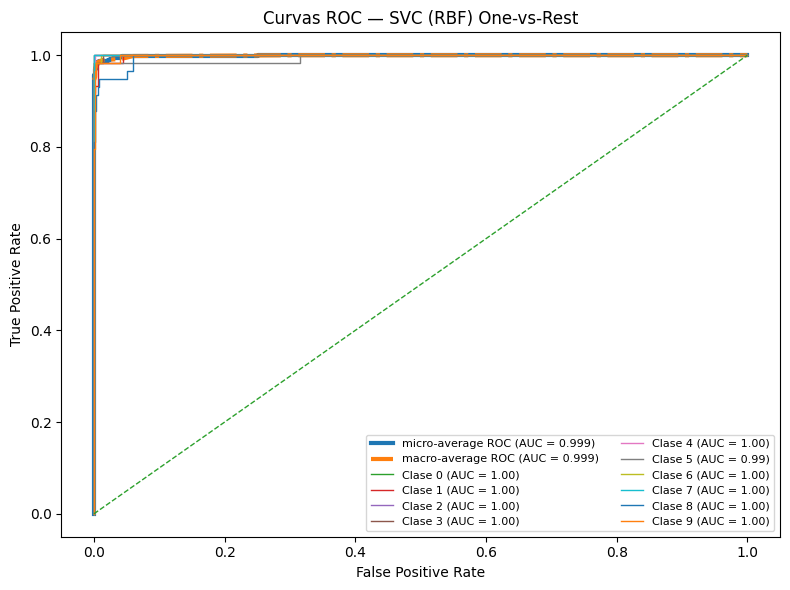

In [31]:
# Gráfico de curvas ROC (micro, macro y por clase)
plt.figure(figsize=(8, 6))

# Curvas agregadas
plt.plot(fpr["micro"], tpr["micro"], linestyle="-", linewidth=3,
         label=f"micro-average ROC (AUC = {roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle="-.", linewidth=3,
         label=f"macro-average ROC (AUC = {roc_auc['macro']:.3f})")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linewidth=1, label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")

# Línea base
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC — SVC (RBF) One-vs-Rest")
plt.legend(loc="lower right", ncol=2, fontsize=8)
plt.tight_layout()
plt.show()


### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [32]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Valores predichos correctamente:


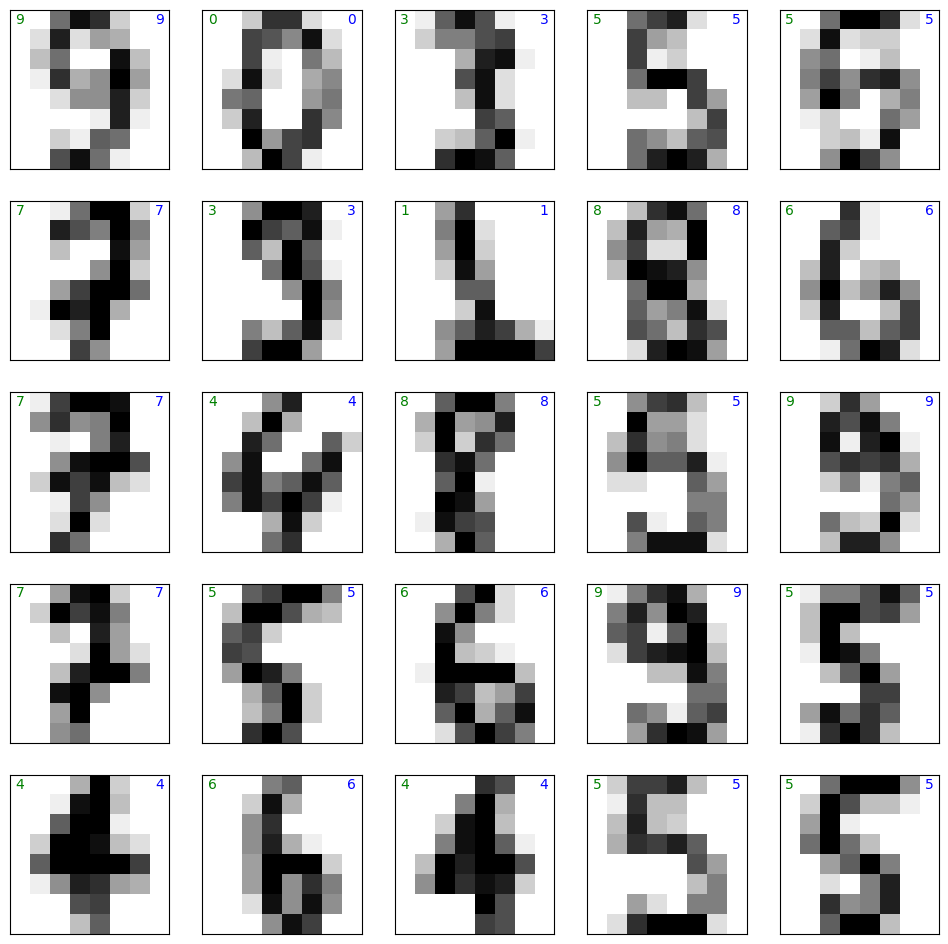


Valores predichos incorrectamente:


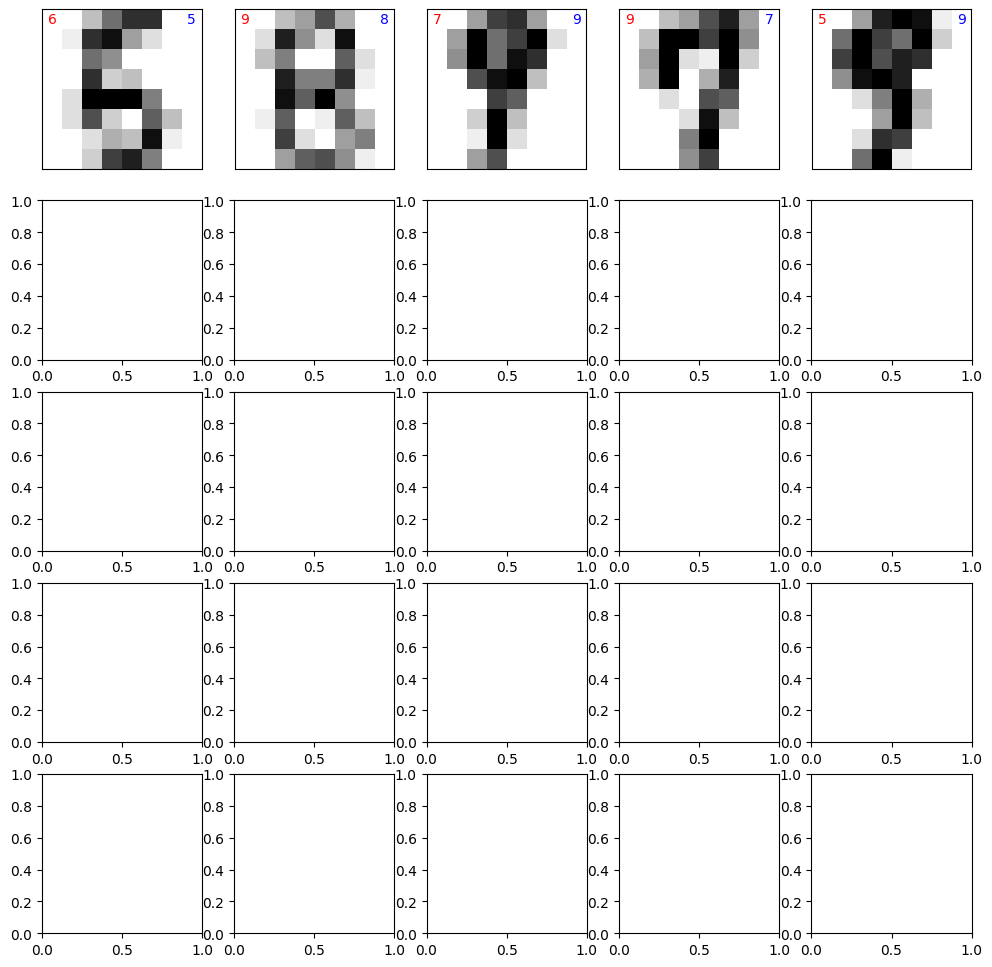

In [33]:
print('Valores predichos correctamente:')
mostrar_resultados(digits, SVC(kernel='rbf', gamma='scale'), nx=5, ny=5, label="correctos")

print('\nValores predichos incorrectamente:')
mostrar_resultados(digits, SVC(kernel='rbf', gamma='scale'), nx=5, ny=5, label="incorrectos")

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

**Veredicto:** El mejor desempeño global lo obtuvo **SVC (RBF)** con una accuracy y F1 aproximadamente a 0.99. Aunque KNN entrenó más rápido, pero su rendimiento fue levemente inferior. En cambio, Regresión Logística queda como buen baseline e interpretable, aunque con menor exactitud.

**Lo que muestran las visualizaciones:** Las matrices de confusión revelan los pocos errores y concentrados en pares de dígitos parecidos, por ejemplo: 3/5, 8/9. Las curvas ROC (micro y macro) se pegan a la esquina superior izquierda, indicando alta capacidad de discriminación. Por otro lado las imágenes de aciertos/errores sugieren que los fallos aparecen con trazos tenues, rotaciones o formas incompletas.

**Respuesta a las preguntas iniciales.**  
* ¿Cuál modelo es mejor basado en sus métricas?

Respuesta: El mejor modelo basado en sus métricas sería el modelo SVC (RBF), ya que tiene una accuracy ≈ 0.9899, la cual es superior a la accuracy de KNN (≈0.9848) y de la Regresión Logística (≈0.9545), también de que SVC (RBF) tiene un F1 macro ≈ 0.99. Además la matriz de confusión de SVC (RBF) muestra menos errores globales.

* ¿Cuál modelo demora menos tiempo en ajustarse?

Respuesta: El modelo que se demora menos tiempo en ajustarse es el KNN, con un tiempo de ajuste de ~0.0013 segundos , el cual es menor al tiempo de ajuste del modelo SVC (RBF) con ~0.022 segundos y de la Regresión Logística con ~0.895 segundos. KNN es casi instantáneo al entrenar porque traslada el costo al momento de predecir.

* ¿Qué modelo escoges?

Respuesta: El modelo que escogería sería SVC (RBF) por su mejor desempeño (accuracy y F1) y errores mínimos. Pero, si la prioridad fuera solo la rapidez de entrenamiento, el modelo KNN sería mi opción.

**Generalización y límites:** Este dataset es limpio y balanceado. En cambio, en escenarios reales el rendimiento puede bajar, ya sea porque hay más ruido, mayor variabilidad de escritura, resoluciones distintas. Conviene reforzar la robustez con con una mayor cantidad de datos.

**Trabajos futuros.**  
- Validación cruzada estratificada y tuning simple, por ejemplo: C, gamma en SVC, y n_neighbors en KNN.  
- Probar ensembles como Random Forest o Gradient Boosting y una CNN pequeña para imágenes.  
- Añadir una tabla comparativa para la accuracy, F1 macro, tiempo de ajuste y de predicción.  

**Dificultades:** Las difucultades que se pueden tener es elegir la partición train/test adecuada, evitar fuga de información, mantener el contraste de imágenes coherente y asegurar resultados reproducibles.
